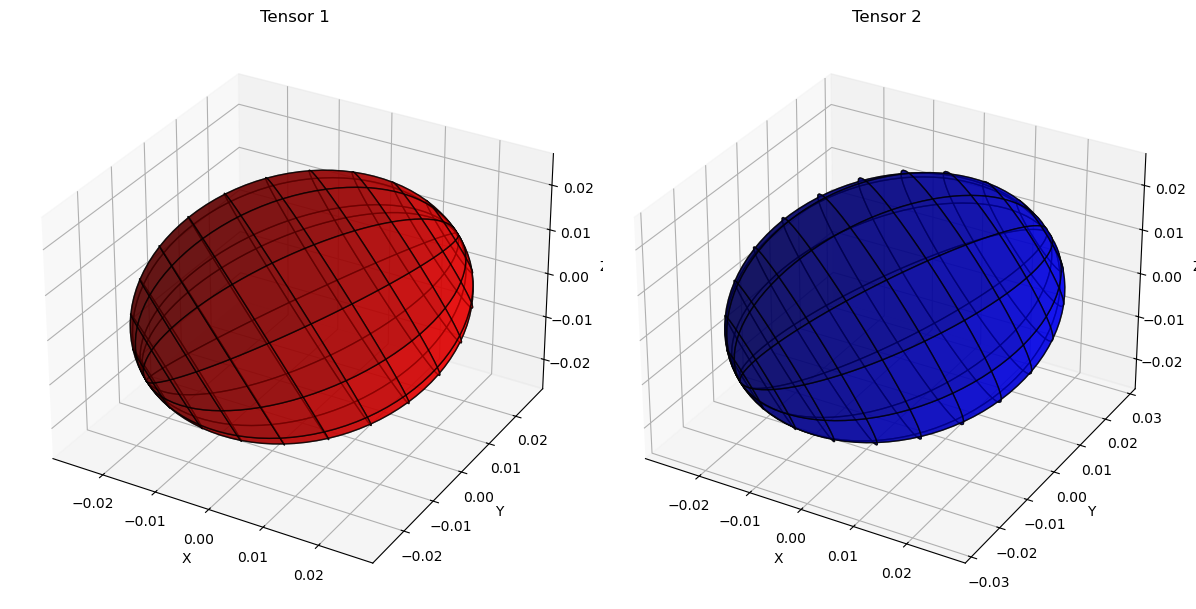

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tensor_to_matrix(tensor):
    """
    Convert a 6-element tensor array (Dxx, Dxy, Dyy, Dxz, Dyz, Dzz)
    into a 3x3 symmetric diffusion tensor matrix.
    """
    Dxx, Dxy, Dyy, Dxz, Dyz, Dzz = tensor
    return np.array([[Dxx, Dxy, Dxz],
                     [Dxy, Dyy, Dyz],
                     [Dxz, Dyz, Dzz]])

def generate_ellipsoid(tensor):
    """
    Generate ellipsoid points for a given diffusion tensor.
    """
    # Convert the tensor to a 3x3 matrix
    D = tensor_to_matrix(tensor)
    
    # Compute eigenvalues and eigenvectors
    eigvals, eigvecs = np.linalg.eigh(D)
    
    # Generate a unit sphere
    phi = np.linspace(0, np.pi, 50)
    theta = np.linspace(0, 2 * np.pi, 50)
    phi, theta = np.meshgrid(phi, theta)
    
    x = np.sin(phi) * np.cos(theta)
    y = np.sin(phi) * np.sin(theta)
    z = np.cos(phi)
    unit_sphere = np.stack((x, y, z), axis=-1)
    
    # Scale the unit sphere to an ellipsoid
    scaled_ellipsoid = unit_sphere @ np.sqrt(np.diag(eigvals))  # Scale
    ellipsoid = scaled_ellipsoid @ eigvecs.T  # Rotate
    
    # Return x, y, z coordinates
    return ellipsoid[..., 0], ellipsoid[..., 1], ellipsoid[..., 2]

def plot_ellipsoids(tensor1, tensor2):
    """
    Plot two diffusion tensor ellipsoids side-by-side for comparison.
    """
    # Generate ellipsoid coordinates
    x1, y1, z1 = generate_ellipsoid(tensor1)
    x2, y2, z2 = generate_ellipsoid(tensor2)
    
    # Create the figure and subplots
    fig = plt.figure(figsize=(12, 6))
    
    # First tensor
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(x1, y1, z1, rstride=4, cstride=4, color='r', alpha=0.7, edgecolor='k')
    ax1.set_title('Tensor 1')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    # Second tensor
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_surface(x2, y2, z2, rstride=4, cstride=4, color='b', alpha=0.7, edgecolor='k')
    ax2.set_title('Tensor 2')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    
    # Show the plots
    plt.tight_layout()
    plt.show()

# Example tensors in 6-element format
tensor1 = [6.69949455e-04, 1.21919904e-04, 7.01577461e-04, 5.02581242e-05, 4.83812764e-05, 6.71636488e-04]  # Tensor 1
tensor2 =  [7.24007716e-04,cl 1.12841726e-04, 7.83610046e-04, 7.18106046e-05, 5.65639759e-05, 6.76167751e-04]  # Tensor 2

# Plot the tensors side-by-side
plot_ellipsoids(tensor1, tensor2)
